In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv('Cinderella_II_Dataset.csv')
data.head()

,engine_fuel_rate,accum_fuel_leg,engine_rpm,accelPedalPos,latitude,longitude,speedOverGround,courseOverGroundTrue,speedApparent,heading_magnetic,...,distanceToPreviousDock,delta_distance,accumDistLeg,Timestamp,accum_time_leg,sailing_state,closest_dock,segment_state,leg,RT_id
0,82.000000,0.013583,1326.416667,0.106413,59.401617,18.355397,0.448467,171.7957,4.662587,167.3953,...,17.744368,0.192010,0.375416,2022-07-01 08:54:52,0.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
1,101.333333,0.036750,1340.500000,0.131053,59.401609,18.355403,0.589003,171.7957,4.363132,167.3953,...,18.369153,0.228877,1.025822,2022-07-01 08:54:53,1.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0
2,114.500000,0.069500,1379.500000,0.146299,59.401597,18.355410,0.742814,171.7957,4.006906,167.3953,...,19.411825,0.274332,1.930372,2022-07-01 08:54:54,2.55,un_specified,vaxholm,docking,vaxholm-sodra,0.0
3,120.000000,0.103833,1423.166667,0.152447,59.401582,18.355416,0.900456,171.7957,4.046811,167.3953,...,20.731121,0.331778,3.011387,2022-07-01 08:54:55,3.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
4,122.000000,0.134333,1423.083333,0.158249,59.401569,18.355422,1.056645,171.7957,4.165147,167.3953,...,21.983082,0.388637,4.119830,2022-07-01 08:54:56,4.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0


In [3]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set the 'Timestamp' column as the index
data.set_index('Timestamp', inplace=True)

In [4]:
selected_features = [
    'windDirection_Onb', 'windSpeed_Onb', 'windSpeed_cpr', 'windDirection_cpr',
    'windSpeed_sg', 'windDirection_sg', 'waveHeight', 'waveDirection', 
    'currentSpeed', 'currentDirection', 'Temp_2m', 'Press_surf', 'Precip',
    'swellHeight', 'secondarySwellHeight', 'WaveSwell_ht', 'Swell_ht',
    'Snow_depth', 'iceCover', 'Snow_fall', 'relativeWind'
]
target_variable = 'engine_fuel_rate'

data['relativeWind'] = abs(data['heading_magnetic'] - data['windDirection_Onb'])
# Resample and aggregate the relevant columns on 1 minute
minute_data = data[selected_features + [target_variable]].resample('1T').mean().fillna(method='ffill')
minute_data.head()

,windDirection_Onb,windSpeed_Onb,windSpeed_cpr,windDirection_cpr,windSpeed_sg,windDirection_sg,waveHeight,waveDirection,currentSpeed,currentDirection,...,Precip,swellHeight,secondarySwellHeight,WaveSwell_ht,Swell_ht,Snow_depth,iceCover,Snow_fall,relativeWind,engine_fuel_rate
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:00,151.263944,5.108177,6.768450,150.832596,3.776125,175.407917,1.240493,151.308114,0.049154,180.0,...,0.002677,0.535771,0.100846,1.387495,0.619659,0.0,0.0,-5.820766e-11,16.131356,114.187500
2022-07-01 08:55:00,189.573235,4.740528,6.772324,150.821211,3.767625,175.474028,1.240546,151.370945,0.049249,180.0,...,0.002670,0.536243,0.100751,1.387990,0.620718,0.0,0.0,-5.820766e-11,40.234593,50.954167
2022-07-01 08:56:00,248.519915,4.926118,6.779159,150.801124,3.752625,175.590694,1.240640,151.481819,0.049415,180.0,...,0.002658,0.537076,0.100585,1.388862,0.622585,0.0,0.0,-5.820766e-11,81.124615,26.983333
2022-07-01 08:57:00,209.009992,7.990278,6.785994,150.781037,3.737625,175.707361,1.240734,151.592693,0.049582,180.0,...,0.002646,0.537910,0.100418,1.389735,0.624452,0.0,0.0,-5.820766e-11,41.614692,64.006944
2022-07-01 08:58:00,222.140363,11.916174,6.792830,150.760950,3.722625,175.824028,1.240827,151.703569,0.049749,180.0,...,0.002634,0.538743,0.100251,1.390607,0.626319,0.0,0.0,-5.820766e-11,54.745063,96.461111


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    minute_data[selected_features], minute_data[target_variable], 
    test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((147767, 21), (36942, 21))

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [7]:
y_pred = rf_regressor.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.0237760321004217
Mean Squared Error: 127.82373753782473
R-squared: 0.9481963553751335


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [11]:
best_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
print(best_rf)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)


In [12]:
best_rf.fit(minute_data[selected_features], minute_data[target_variable])

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [13]:
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                 Feature  Importance
11            Press_surf    0.336893
1          windSpeed_Onb    0.292183
16              Swell_ht    0.043168
12                Precip    0.039715
2          windSpeed_cpr    0.038991
20          relativeWind    0.036699
0      windDirection_Onb    0.034166
15          WaveSwell_ht    0.024303
7          waveDirection    0.024126
10               Temp_2m    0.018690
14  secondarySwellHeight    0.018096
4           windSpeed_sg    0.018012
8           currentSpeed    0.017514
13           swellHeight    0.014465
6             waveHeight    0.014121
5       windDirection_sg    0.013786
3      windDirection_cpr    0.011189
9       currentDirection    0.003881
17            Snow_depth    0.000000
18              iceCover    0.000000
19             Snow_fall    0.000000


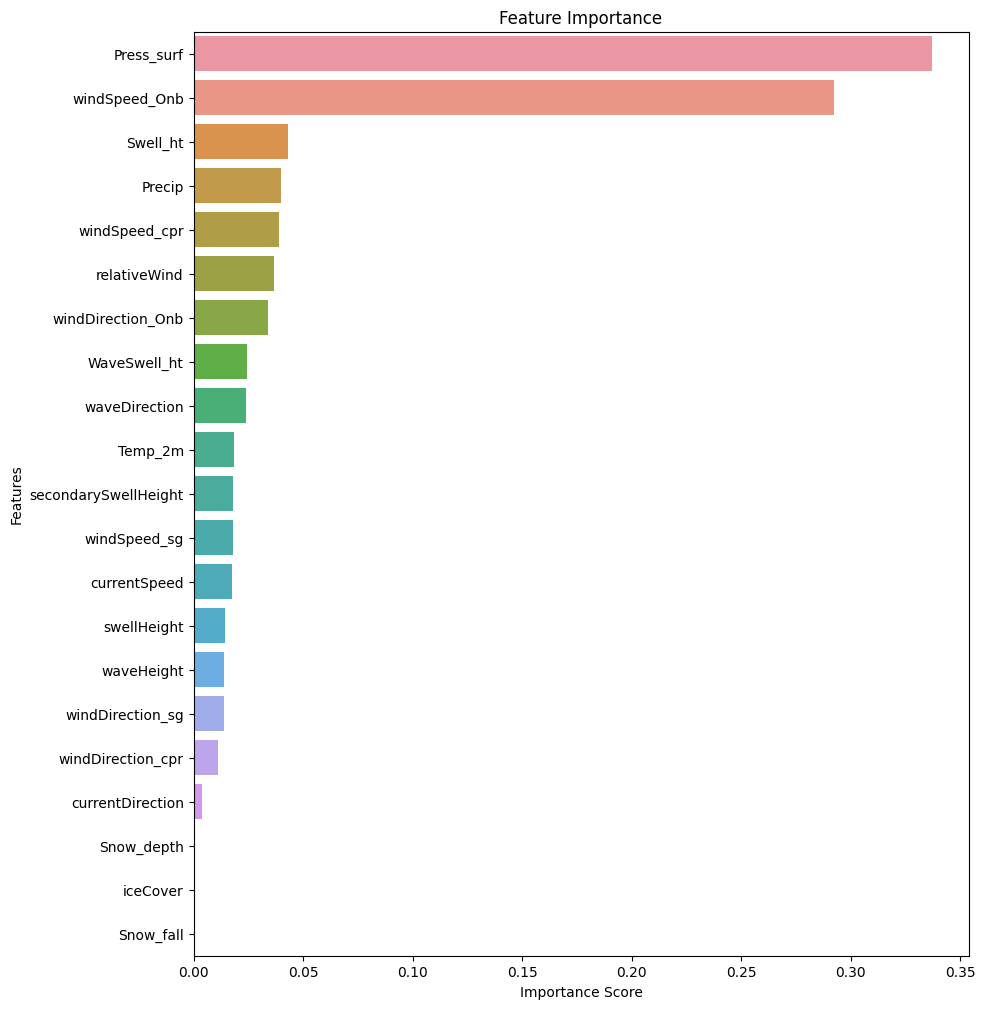

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort feature importance
sorted_idx = feature_importance['Importance'].sort_values(ascending=False).index

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(x=feature_importance['Importance'][sorted_idx], y=feature_importance['Feature'][sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [15]:
top_features = feature_importance['Feature'][:3]  # top 3 features
minute_data[top_features].describe()

,Press_surf,windSpeed_Onb,Swell_ht
count,184709.000000,184709.000000,184709.000000
mean,100961.618591,4.177241,0.364051
std,851.932272,2.684621,0.141690
min,99792.090000,0.255685,0.067306
25%,100140.288556,2.644405,0.261376
50%,101027.873784,3.331310,0.321612
75%,101513.430712,5.472062,0.434519
max,102811.957852,39.796891,1.101916


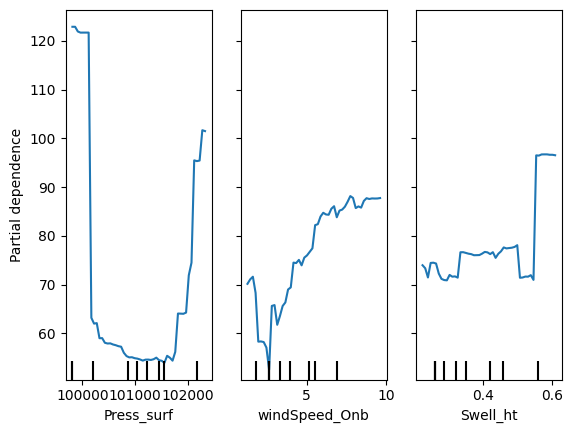

In [16]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(best_rf, X_train, features=top_features, grid_resolution=50)
plt.show()


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    minute_data[top_features], minute_data[target_variable], 
    test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

In [26]:
# Evaluate the Model
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(808.4337149235621, 0.6723627889673613)

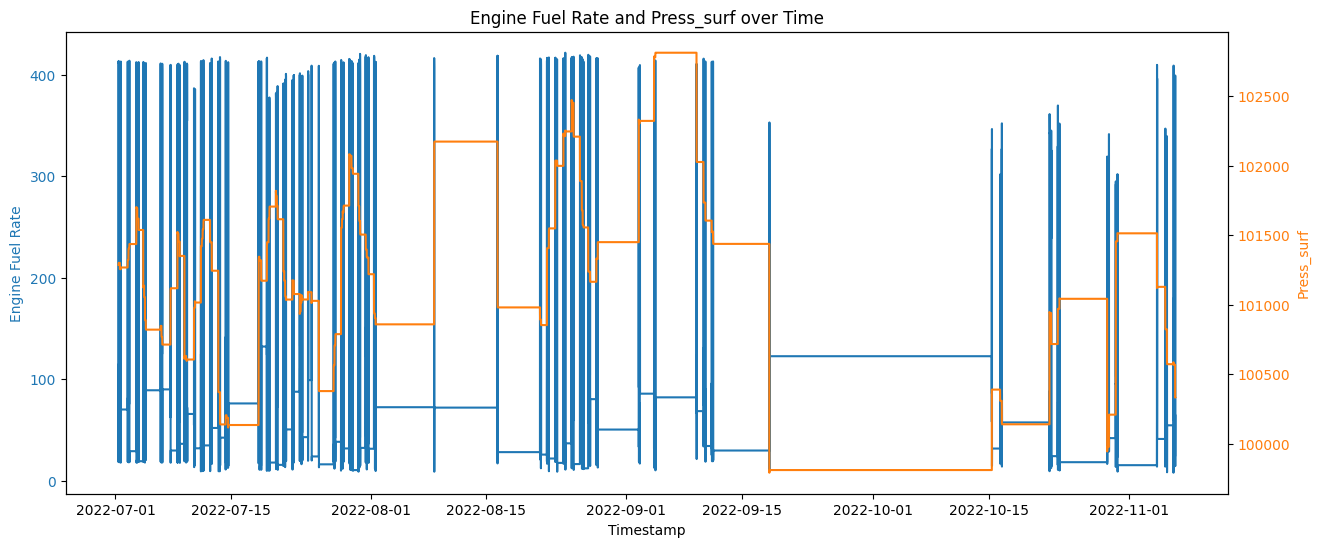

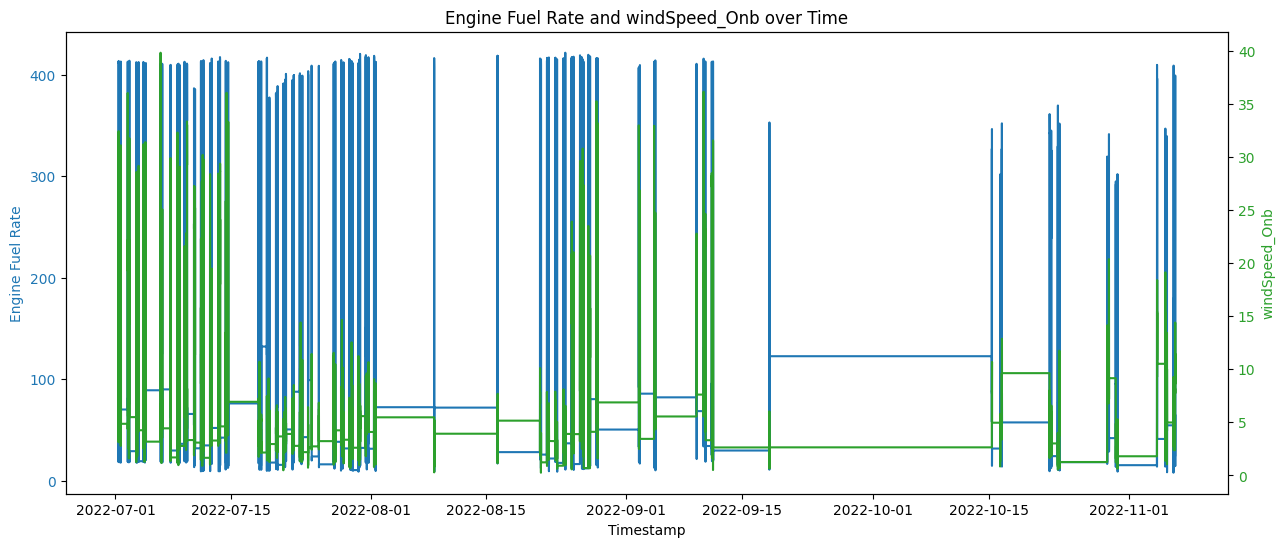

In [17]:
import matplotlib.pyplot as plt

# Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plotting fuel consumption
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Engine Fuel Rate', color='tab:blue')
ax1.plot(minute_data.index, minute_data['engine_fuel_rate'], color='tab:blue', label='Engine Fuel Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to overlay Press_surf
ax2 = ax1.twinx()
ax2.set_ylabel('Press_surf', color='tab:orange')
ax2.plot(minute_data.index, minute_data['Press_surf'], color='tab:orange', label='Press_surf')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and show the plot
plt.title('Engine Fuel Rate and Press_surf over Time')
plt.show()


# Setting up the figure and axes for the second graph
fig, ax3 = plt.subplots(figsize=(15, 6))

# Plotting fuel consumption
ax3.set_xlabel('Timestamp')
ax3.set_ylabel('Engine Fuel Rate', color='tab:blue')
ax3.plot(minute_data.index, minute_data['engine_fuel_rate'], color='tab:blue', label='Engine Fuel Rate')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to overlay windSpeed_Onb
ax4 = ax3.twinx()
ax4.set_ylabel('windSpeed_Onb', color='tab:green')
ax4.plot(minute_data.index, minute_data['windSpeed_Onb'], color='tab:green', label='windSpeed_Onb')
ax4.tick_params(axis='y', labelcolor='tab:green')

# Title and show the plot
plt.title('Engine Fuel Rate and windSpeed_Onb over Time')
plt.show()


## Conclusion

After using a random regressor, feature importance suggests that Press surf and wind speed have the highest among other features but are still insignificant. Press surf was 33% and wind speed 29%. Afterward, we implemented an SVR model with an MSE of 808 and r^2 of 67%, indicating that weather features might not significantly impact fuel consumption. The time series analysis confirmed our findings.  